# EDA La liga

## 1. Entregable.

### 1. **Título del trabajo:**
Predicción de Resultados de Partidos de Fútbol en La Liga utilizando Regresión Logística

### 2. **Introducción:**
En este proyecto, desarrollamos un modelo de predicción de resultados de partidos de fútbol en La Liga utilizando un modelo de regresión logística. Utilizando datos estadísticos de la temporada actual obtenidos de la página FBref, intentamos predecir si un equipo ganará, empatará o perderá en un partido. El fútbol es un deporte popular con una enorme cantidad de datos disponibles, lo que lo convierte en un excelente caso de estudio para aplicar técnicas de ciencia de datos. Este tipo de modelos predictivos son útiles para aficionados, analistas deportivos y casas de apuestas que buscan pronosticar los resultados de los partidos.

### 3. **Antecedentes:**
El uso de técnicas de machine learning en deportes ha aumentado significativamente en los últimos años. En el fútbol, es común utilizar estadísticas como la posesión del balón, el número de tiros, los goles a favor y en contra, entre otras, para modelar el rendimiento de los equipos y predecir sus resultados. La regresión logística es una técnica estadística que se adapta bien a este tipo de problemas de clasificación, ya que permite modelar la probabilidad de resultados categóricos (ganar, empatar, perder) en función de varias características de los equipos y los partidos. En este proyecto, se utilizarán datos históricos de FBref para crear un modelo predictivo de los resultados en La Liga.

### 4. **Objetivos:**

#### **Objetivos Generales:**
Desarrollar un modelo de predicción basado en regresión logística para predecir el resultado de los partidos de fútbol en La Liga, utilizando datos estadísticos históricos. El objetivo principal es aplicar conceptos de ciencia de datos y machine learning para generar una herramienta que pueda predecir con precisión si un equipo ganará, empatará o perderá un partido.

#### **Objetivos Específicos:**
- Realizar una recolección y análisis exploratorio de los datos de FBref sobre La Liga.
- Preprocesar los datos para eliminar valores nulos, codificar variables categóricas y escalar las variables numéricas.
- Entrenar un modelo de regresión logística multiclase que clasifique los resultados en "gana", "empata" o "pierde".
- Evaluar el rendimiento del modelo utilizando métricas como la matriz de confusión y el informe de clasificación.
- Implementar mejoras en el modelo si es necesario y analizar los resultados obtenidos.

### 5. **Planteamiento del problema:**
La predicción de resultados de partidos de fútbol es un desafío importante debido a la naturaleza impredecible del deporte, con factores como el rendimiento de los jugadores, lesiones, tácticas y decisiones arbitrales influyendo en los resultados. Sin embargo, con el análisis adecuado de los datos históricos y las estadísticas avanzadas, se pueden identificar patrones que permiten modelar los resultados. El problema que abordamos en este proyecto es la creación de un modelo predictivo que, basándose en estadísticas de equipos y partidos, prediga con precisión si un equipo ganará, empatará o perderá. Este tipo de predicción tiene aplicaciones en análisis deportivo y apuestas.

### 6. **Desarrollo de la solución:**

#### 6.1. **Recolección de datos:**
- Se utilizarán los datos de la temporada actual de La Liga extraídos de la página de FBref. Los datos incluirán estadísticas de equipos, como goles a favor, goles en contra, posesión del balón, tiros a puerta, entre otros.

#### 6.2. **Preprocesamiento de datos:**
- Limpieza de datos para eliminar filas o columnas con valores faltantes.
- Codificación de variables categóricas como nombres de equipos o ubicaciones en variables numéricas usando la técnica de **One-Hot Encoding**.
- Normalización de las variables numéricas para garantizar que los valores estén en una escala adecuada para la regresión logística.

#### 6.3. **Entrenamiento del modelo:**
- Se dividirán los datos en conjuntos de entrenamiento y prueba.
- Se implementará un modelo de regresión logística multiclase utilizando la librería **scikit-learn**.
- El modelo será entrenado en el conjunto de datos de entrenamiento.

#### 6.4. **Evaluación del modelo:**
- Se generará la matriz de confusión y el informe de clasificación para medir el rendimiento del modelo en el conjunto de datos de prueba.
- Se analizarán las métricas de precisión, recall y F1-score para cada categoría (gana, empata, pierde).


Librerías

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Importamos el archivo

In [18]:
df = pd.read_csv('laliga.csv')
df

,Día,Sedes,Adversario,Anfitrion,Edad(opp),Pos.(opp),Ass(opp),TPint(opp),PrgC(opp),PrgP(opp),...,PP(tm),GF(tm),GC(tm),xG(tm),xGA(tm),Últimos 5(tm),Máximo Goleador del Equipo(tm),GF,GC,Resultado
0,5,1,Rayo Vallecano,Almería,30.2,46.0,8,5,178,499,...,12,17,39,22.6,27.2,1,5,0,2,1
1,6,1,Real Madrid,Almería,27.9,58.8,26,2,410,830,...,12,17,39,22.6,27.2,1,5,1,3,1
2,6,0,Cádiz,Almería,29.4,39.1,8,1,172,335,...,12,17,39,22.6,27.2,1,5,1,1,2
3,5,1,Celta Vigo,Almería,27.1,44.9,10,2,290,522,...,12,17,39,22.6,27.2,1,5,2,3,1
4,7,0,Villarreal,Almería,28.4,53.1,15,3,250,627,...,12,17,39,22.6,27.2,1,5,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,7,0,Villarreal,Cádiz,28.4,50.9,22,4,349,847,...,10,15,31,17.9,32.1,2,5,0,0,2
447,7,0,Osasuna,Celta Vigo,28.6,48.3,15,4,297,788,...,11,21,32,28.4,31.1,4,7,3,0,3
448,7,0,Betis,Getafe,28.3,49.0,17,0,410,827,...,7,28,30,25.2,31.3,4,14,1,1,2
449,7,0,Real Madrid,Atlético Madrid,28.0,59.4,37,3,583,1175,...,5,44,24,37.6,23.9,12,13,1,1,2


In [5]:
df.isnull().sum()

Día                                0
Sedes                              0
Adversario                         0
Anfitrion                          0
Edad(opp)                          0
Pos.(opp)                          0
Ass(opp)                           0
TPint(opp)                         0
PrgC(opp)                          0
PrgP(opp)                          0
% de TT(opp)                       0
Dist(opp)                          0
% Cmp(opp)                         0
Dist. tot.(opp)                    0
TklG(opp)                          0
Int(opp)                           0
Err(opp)                           0
RL(opp)                            0
PG(opp)                            0
PE(opp)                            0
PP(opp)                            0
GF(opp)                            0
GC(opp)                            0
xG(opp)                            0
xGA(opp)                           0
Últimos 5(opp)                     0
Máximo Goleador del Equipo(opp)    0
E

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 53 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Día                              451 non-null    category
 1   Sedes                            451 non-null    category
 2   Adversario                       451 non-null    category
 3   Anfitrion                        451 non-null    object  
 4   Edad(opp)                        451 non-null    float64 
 5   Pos.(opp)                        451 non-null    float64 
 6   Ass(opp)                         451 non-null    int64   
 7   TPint(opp)                       451 non-null    int64   
 8   PrgC(opp)                        451 non-null    int64   
 9   PrgP(opp)                        451 non-null    int64   
 10  % de TT(opp)                     451 non-null    float64 
 11  Dist(opp)                        451 non-null    float64 
 12  % Cmp(op

Vamos a definir las variables categóricas y númericas

In [35]:
df['Día'] = df['Día'].astype('category')
df['Sedes'] = df['Sedes'].astype('category')
df['Adversario'] = df['Adversario'].astype('category')
df["Resultado"] = df["Resultado"].astype('category')


Como son demasiadas variables vamos a descartar algunas, primero utilizaremos la correlación y descartaremos las que tengan un nivel muy alto de correlación, ya que al final dicen lo mismo.

Cuando existe correlación entre 2 variables predictoras "X", no podemos determinar el efecto de una 1 variable tomando en cuenta que la otra variable es constante ya que las dos variables cambian juntas.

Cuando se tienen variables relacionadas, se puede considerar que todas las variables proporcionan la misma información al modelo. Por lo que, es deseable seleccionar solo variables que no estén relacionadas y evitar redundancia de información.

Si dos variables están altamente correlacionadas, dejar sólo una va a ayudar a reducir la dimensionalidad sin perder mucha información.

La matriz de correlaciones puede ayudar a visualizar si existen variables candidatas a ser descartadas. Un buen Threshold para eliminar variables, es quitar todas aquellas cuya correlación > 0.6

In [36]:
import pandas as pd
import numpy as np

# Separar X (variables predictoras) y Y (variable objetivo)
X = df.select_dtypes(include=['float64', 'int64'])  # Selecciona solo las variables numéricas
Y = df['Resultado']  # La variable predictora

# Matriz de correlación de las variables numéricas
co = X.corr()
co.style.background_gradient(cmap='coolwarm').format(precision=2)


def calcDrop(res):
    # Obtener todas las variables con una correlación > 0.6
    all_corr_vars = list(set(res['v1'].tolist() + res['v2'].tolist()))
    
    # Todas las variables únicas en las columnas a remover
    poss_drop = list(set(res['drop'].tolist()))

    # Quedarse con las variables que no estén en las variables a remover
    keep = list(set(all_corr_vars).difference(set(poss_drop)))
     
    p = res[ res['v1'].isin(keep)  | res['v2'].isin(keep) ][['v1', 'v2']]
    q = list(set(p['v1'].tolist() + p['v2'].tolist()))
    drop = (list(set(q).difference(set(keep))))

    poss_drop = list(set(poss_drop).difference(set(drop)))
    
    m = res[ res['v1'].isin(poss_drop)  | res['v2'].isin(poss_drop) ][['v1', 'v2','drop']]
        
    more_drop = set(list(m[~m['v1'].isin(drop) & ~m['v2'].isin(drop)]['drop']))
    for item in more_drop:
        drop.append(item)
         
    return drop

def corrX_new(df, cut=0.6):
    # Obtener la matriz de correlación absoluta
    corr_mtx = df.corr().abs()
    avg_corr = corr_mtx.mean(axis=1)
    up = corr_mtx.where(np.triu(np.ones(corr_mtx.shape), k=1).astype(bool))
    
    dropcols = list()
    
    res = pd.DataFrame(columns=['v1', 'v2', 'v1.target', 
                                'v2.target', 'corr', 'drop'])
    
    for row in range(len(up)-1):
        col_idx = row + 1
        for col in range(col_idx, len(up)):
            if(corr_mtx.iloc[row, col] > cut):
                if(avg_corr.iloc[row] > avg_corr.iloc[col]): 
                    dropcols.append(row)
                    drop = corr_mtx.columns[row]
                else: 
                    dropcols.append(col)
                    drop = corr_mtx.columns[col]
                
                s = pd.DataFrame([[corr_mtx.index[row],
                                   up.columns[col],
                                   avg_corr[row],
                                   avg_corr[col],
                                   up.iloc[row, col],
                                   drop]],
                                 columns=res.columns)
        
                # Usar pd.concat en lugar de append
                res = pd.concat([res, s], ignore_index=True)
    
    dropcols_names = calcDrop(res)
    
    return dropcols_names

# Ejecutar la función para obtener las variables a eliminar
drop = corrX_new(X)
print("Variables a eliminar:", drop)


Variables a eliminar: ['RL(tm)', 'Últimos 5(opp)', '% Cmp(tm)', 'GF(tm)', 'xG(opp)', 'Ass(tm)', '% Cmp(opp)', 'PP(tm)', 'xGA(tm)', 'RL(opp)', 'Dist. tot.(tm)', 'PrgP(opp)', 'TklG(tm)', 'GF(opp)', 'PrgC(tm)', 'xGA(opp)', 'TklG(opp)', 'Últimos 5(tm)', 'xG(tm)', 'PrgP(tm)', 'PG(opp)', 'PrgC(opp)', 'PP(opp)', 'Dist. tot.(opp)', 'PG(tm)', 'Ass(opp)']


/var/folders/sk/pvtckwm10nz9m00s0ldjlwsc0000gn/T/ipykernel_13680/1788132824.py:61: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[row],
/var/folders/sk/pvtckwm10nz9m00s0ldjlwsc0000gn/T/ipykernel_13680/1788132824.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_corr[col],
/var/folders/sk/pvtckwm10nz9m00s0ldjlwsc0000gn/T/ipykernel_13680/1788132824.py:68: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relev

In [40]:
X_no_corr = X.drop(columns= ['RL(tm)', 'Últimos 5(opp)', '% Cmp(tm)', 'GF(tm)', 'xG(opp)', 'Ass(tm)', '% Cmp(opp)', 'PP(tm)', 'xGA(tm)', 'RL(opp)', 'Dist. tot.(tm)', 'PrgP(opp)', 'TklG(tm)', 'GF(opp)', 'PrgC(tm)', 'xGA(opp)', 'TklG(opp)', 'Últimos 5(tm)', 'xG(tm)', 'PrgP(tm)', 'PG(opp)', 'PrgC(opp)', 'PP(opp)', 'Dist. tot.(opp)', 'PG(tm)', 'Ass(opp)'], axis=1)

In [41]:
X_no_corr

,Edad(opp),Pos.(opp),TPint(opp),% de TT(opp),Dist(opp),Int(opp),Err(opp),PE(opp),GC(opp),Máximo Goleador del Equipo(opp),...,TPint(tm),% de TT(tm),Dist(tm),Int(tm),Err(tm),PE(tm),GC(tm),Máximo Goleador del Equipo(tm),GF,GC
0,30.2,46.0,5,38.9,21.2,115,4,7,22,4,...,1,35.5,18.2,129,4,4,39,5,0,2
1,27.9,58.8,2,37.2,17.8,143,4,3,10,12,...,1,35.5,18.2,129,4,4,39,5,1,3
2,29.4,39.1,1,33.8,18.6,116,4,7,23,4,...,1,35.5,18.2,129,4,4,39,5,1,1
3,27.1,44.9,2,28.5,17.6,118,3,6,25,5,...,1,35.5,18.2,129,4,4,39,5,2,3
4,28.4,53.1,3,35.0,15.6,112,8,4,29,8,...,1,35.5,18.2,129,4,4,39,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,28.4,50.9,4,36.2,15.7,170,11,5,45,10,...,2,29.4,18.6,171,6,10,31,5,0,0
447,28.6,48.3,4,30.6,17.7,158,10,5,33,10,...,3,29.9,18.0,188,3,8,32,7,3,0
448,28.3,49.0,0,28.4,16.8,192,2,10,24,6,...,5,36.6,17.9,182,6,8,30,14,1,1
449,28.0,59.4,3,37.8,17.5,198,5,3,14,14,...,3,43.3,15.3,151,5,2,24,13,1,1


In [42]:
co= X_no_corr.corr()
co.style.background_gradient(cmap='coolwarm').format(precision=2)

,Edad(opp),Pos.(opp),TPint(opp),% de TT(opp),Dist(opp),Int(opp),Err(opp),PE(opp),GC(opp),Máximo Goleador del Equipo(opp),Edad(tm),Pos.(tm),TPint(tm),% de TT(tm),Dist(tm),Int(tm),Err(tm),PE(tm),GC(tm),Máximo Goleador del Equipo(tm),GF,GC
Edad(opp),1.00,-0.16,0.07,0.20,-0.06,0.02,-0.19,0.35,-0.06,0.03,-0.07,0.02,0.03,-0.03,0.02,0.05,0.07,0.02,0.03,0.01,-0.02,-0.02
Pos.(opp),-0.16,1.00,-0.07,0.30,-0.13,-0.16,0.01,-0.48,-0.37,0.35,0.02,-0.04,0.02,-0.03,0.06,0.04,0.02,0.04,0.02,-0.02,-0.06,0.28
TPint(opp),0.07,-0.07,1.00,0.19,0.29,-0.06,0.48,-0.08,0.10,0.05,0.03,0.02,-0.01,0.02,-0.01,0.16,0.01,0.04,0.06,0.07,-0.01,-0.06
% de TT(opp),0.20,0.30,0.19,1.00,-0.24,-0.27,0.20,-0.35,-0.08,0.50,-0.03,-0.02,0.03,-0.02,0.04,0.03,0.02,-0.02,-0.01,-0.01,-0.01,0.22
Dist(opp),-0.06,-0.13,0.29,-0.24,1.00,0.25,0.00,0.25,-0.06,-0.50,0.01,0.06,-0.01,0.04,-0.04,-0.05,-0.03,-0.06,-0.05,0.04,-0.03,-0.23
Int(opp),0.02,-0.16,-0.06,-0.27,0.25,1.00,-0.16,0.47,0.02,0.14,0.06,0.04,0.15,0.02,-0.06,0.35,0.11,0.10,0.16,0.18,-0.09,-0.14
Err(opp),-0.19,0.01,0.48,0.20,0.00,-0.16,1.00,-0.07,0.47,0.09,0.08,0.02,-0.00,0.01,-0.03,0.14,-0.05,0.06,0.03,0.06,0.14,-0.03
PE(opp),0.35,-0.48,-0.08,-0.35,0.25,0.47,-0.07,1.00,0.17,-0.37,0.03,0.03,0.03,-0.02,-0.07,0.09,0.04,0.04,0.07,0.05,-0.01,-0.25
GC(opp),-0.06,-0.37,0.10,-0.08,-0.06,0.02,0.47,0.17,1.00,-0.22,0.03,0.02,0.06,-0.02,-0.04,0.17,0.03,0.07,0.06,0.09,0.27,-0.14
Máximo Goleador del Equipo(opp),0.03,0.35,0.05,0.50,-0.50,0.14,0.09,-0.37,-0.22,1.00,0.00,-0.02,0.07,-0.02,0.04,0.18,0.06,0.06,0.09,0.02,-0.10,0.28


Podemos observar que ya no hay variables predictoras que estén altamente correlacionadas

In [43]:
X_no_corr

,Edad(opp),Pos.(opp),TPint(opp),% de TT(opp),Dist(opp),Int(opp),Err(opp),PE(opp),GC(opp),Máximo Goleador del Equipo(opp),...,TPint(tm),% de TT(tm),Dist(tm),Int(tm),Err(tm),PE(tm),GC(tm),Máximo Goleador del Equipo(tm),GF,GC
0,30.2,46.0,5,38.9,21.2,115,4,7,22,4,...,1,35.5,18.2,129,4,4,39,5,0,2
1,27.9,58.8,2,37.2,17.8,143,4,3,10,12,...,1,35.5,18.2,129,4,4,39,5,1,3
2,29.4,39.1,1,33.8,18.6,116,4,7,23,4,...,1,35.5,18.2,129,4,4,39,5,1,1
3,27.1,44.9,2,28.5,17.6,118,3,6,25,5,...,1,35.5,18.2,129,4,4,39,5,2,3
4,28.4,53.1,3,35.0,15.6,112,8,4,29,8,...,1,35.5,18.2,129,4,4,39,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,28.4,50.9,4,36.2,15.7,170,11,5,45,10,...,2,29.4,18.6,171,6,10,31,5,0,0
447,28.6,48.3,4,30.6,17.7,158,10,5,33,10,...,3,29.9,18.0,188,3,8,32,7,3,0
448,28.3,49.0,0,28.4,16.8,192,2,10,24,6,...,5,36.6,17.9,182,6,8,30,14,1,1
449,28.0,59.4,3,37.8,17.5,198,5,3,14,14,...,3,43.3,15.3,151,5,2,24,13,1,1


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Asegúrate de tener la variable 'resultado' (Y) separada del dataframe original
y = df['Resultado']  # La variable categórica 'resultado'

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_no_corr, y, test_size=0.3, random_state=42)

# Escalar los datos (importante para la regularización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar la regresión logística con regularización L1 (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # C controla la regularización
logreg_l1.fit(X_train_scaled, y_train)

# Ver los coeficientes de las variables
coef = pd.Series(logreg_l1.coef_[0], index=X_no_corr.columns)
print("Coeficientes de la regresión logística con L1:", coef)

# Mostrar las variables seleccionadas (aquellas con coeficientes diferentes de 0)
selected_features = coef[coef != 0].index.tolist()
print("Variables seleccionadas:", selected_features)

# Predicciones y reporte de clasificación
y_pred = logreg_l1.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


Coeficientes de la regresión logística con L1: Edad(opp)                         -0.007294
Pos.(opp)                          0.000000
TPint(opp)                         0.000000
% de TT(opp)                       0.000000
Dist(opp)                          0.000000
Int(opp)                           0.000000
Err(opp)                           0.000000
PE(opp)                           -0.119342
GC(opp)                            0.000000
Máximo Goleador del Equipo(opp)    0.000000
Edad(tm)                           0.000000
Pos.(tm)                           0.000000
TPint(tm)                          0.000000
% de TT(tm)                        0.000000
Dist(tm)                           0.000000
Int(tm)                            0.000000
Err(tm)                            0.000000
PE(tm)                             0.000000
GC(tm)                             0.000000
Máximo Goleador del Equipo(tm)     0.000000
GF                                -7.184608
GC                           

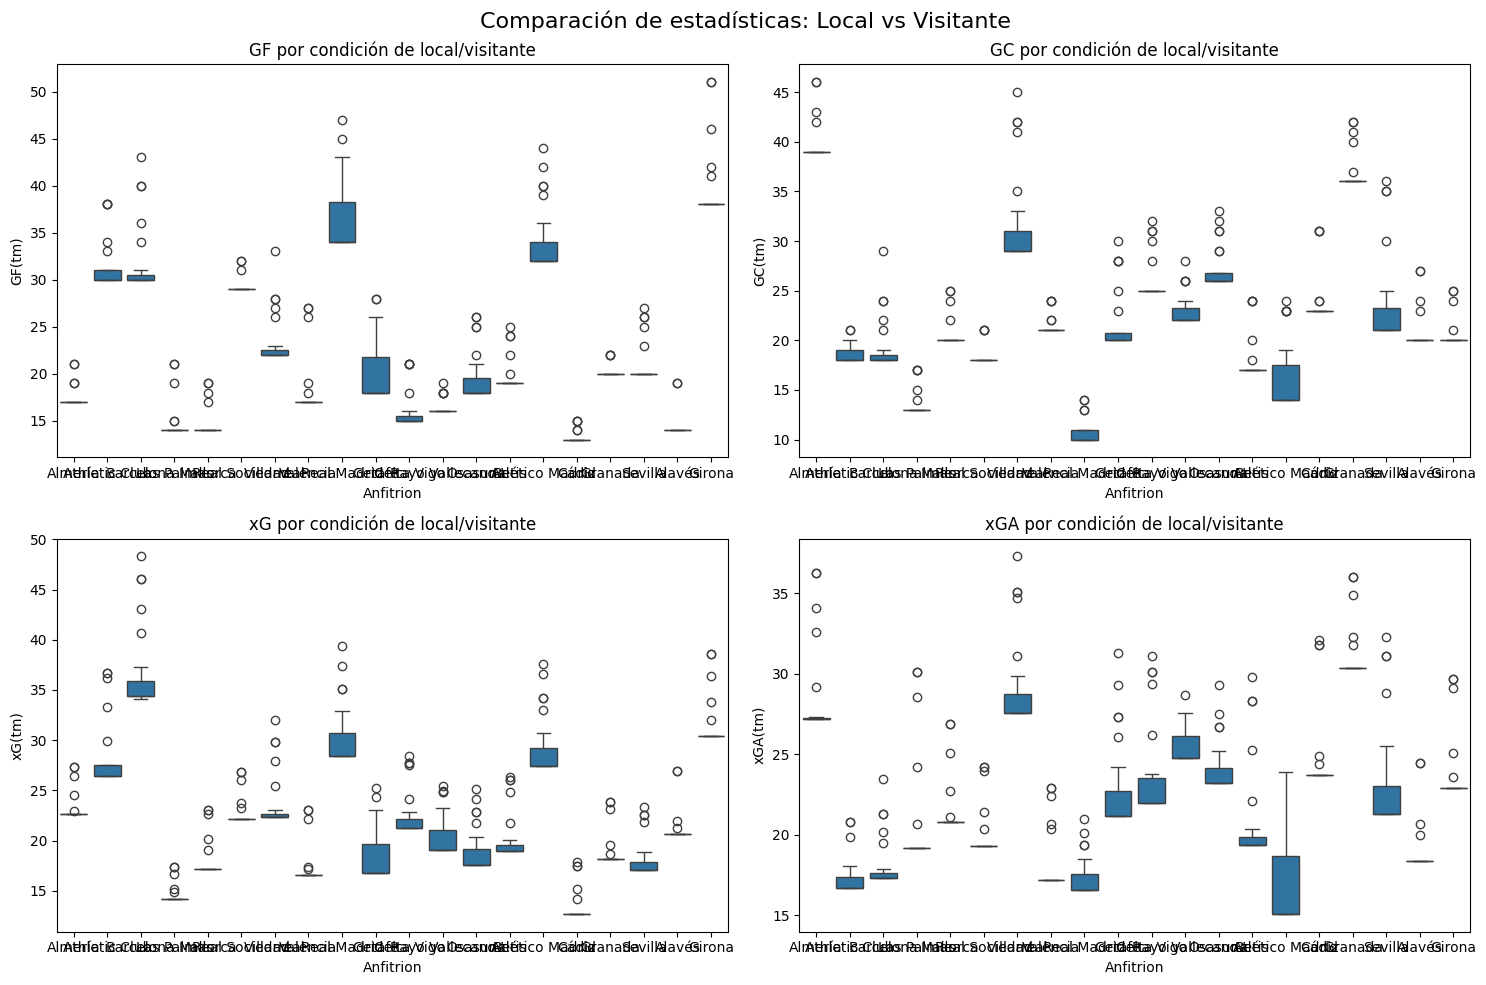

In [15]:
home_away_cols = ['GF', 'GC', 'xG', 'xGA']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Comparación de estadísticas: Local vs Visitante', fontsize=16)

for i, col in enumerate(home_away_cols):
    sns.boxplot(data=df, x='Anfitrion', y=f'{col}(tm)', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} por condición de local/visitante')

plt.tight_layout()
plt.show()

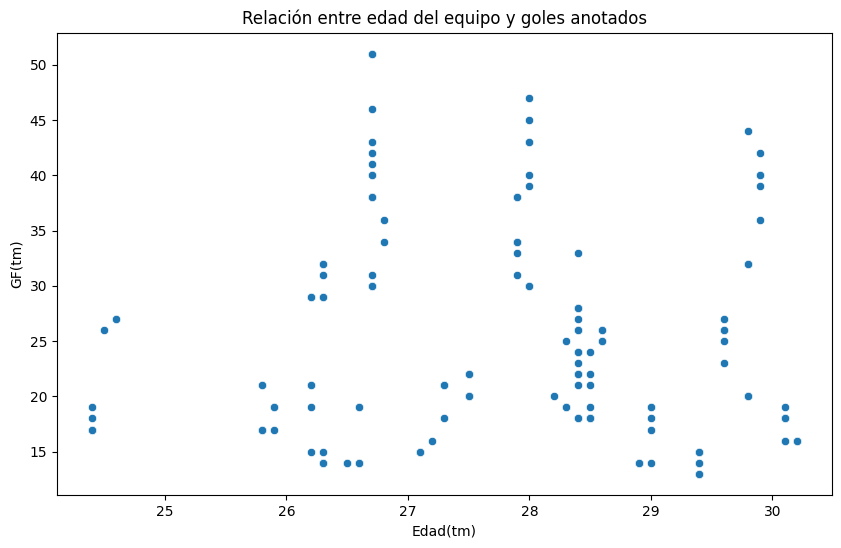

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Edad(tm)', y='GF(tm)')
plt.title('Relación entre edad del equipo y goles anotados')
plt.show()


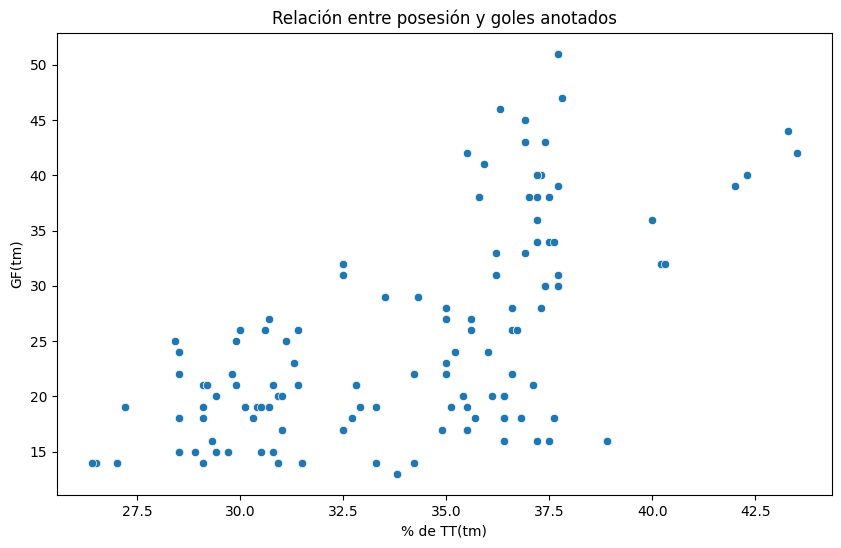

In [17]:
#Análisis de posesión y su impacto
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='% de TT(tm)', y='GF(tm)')
plt.title('Relación entre posesión y goles anotados')
plt.show()